#1.Can we use Bagging for regression problems?

Why Bagging works for Regression:

Reduces Variance: Bagging, or Bootstrap Aggregating, is an ensemble method that aims to reduce the variance of a prediction model. This is achieved by training multiple base learners (like decision trees) on different subsets of the training data and then averaging their predictions. This averaging process helps to smooth out individual model errors and produce a more stable prediction.
Improves Stability: By combining predictions from multiple models, Bagging reduces the impact of any single model's instability. This leads to more robust predictions that are less sensitive to fluctuations in the training data.
How to use Bagging for Regression:

Create Bootstrap Samples: Randomly sample data points from your training data with replacement to create multiple bootstrap samples. Each sample should have the same size as the original training dataset.

Train Base Learners: Train a separate regression model (e.g., a decision tree) on each bootstrap sample.

Aggregate Predictions: For a new data point, obtain predictions from all the trained base learners. Average these predictions to produce the final prediction.

    from sklearn.ensemble import BaggingRegressor
    from sklearn.tree import DecisionTreeRegressor

    # Create a BaggingRegressor with DecisionTreeRegressor as the base learner
    bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                     n_estimators=10,
                                     random_state=42)

    # Fit the BaggingRegressor to your training data
    bagging_regressor.fit(X_train, y_train)

    # Make predictions on new data
    y_pred = bagging_regressor.predict(X_test)

In this example, BaggingRegressor uses 10 decision trees (n_estimators=10) as base learners. The random_state parameter is set for reproducibility. You would replace X_train, y_train, and X_test with your actual training and testing data.    

#3.Explain the concept of feature randomness in Random Forest.

Feature randomness, also known as feature bagging or the random subspace method, is a crucial technique used in Random Forest to enhance the diversity and performance of the model.

#Here's how it works:

Subset of Features: When building individual decision trees within a Random Forest, instead of considering all available features for each split, a random subset of features is selected. This subset is typically much smaller than the total number of features in the dataset.

Random Selection: The features for the subset are chosen randomly at each node of the decision tree. This random selection introduces variability in the trees and prevents them from becoming too correlated with each other.

Improved Diversity: By using different subsets of features for different trees, feature randomness promotes diversity within the Random Forest. This diversity is key to reducing overfitting and improving the generalization ability of the model.

Reduced Correlation: Feature randomness also helps to decorrelate the trees in the forest. If all trees were built using the same set of features, they would likely make similar predictions, and the ensemble would not be as effective. By introducing randomness, the trees become more independent, and their combined predictions are more robust.

#Benefits of Feature Randomness:

Reduced Overfitting: By limiting the features considered at each split, feature randomness helps prevent individual trees from becoming too complex and overfitting the training data.
Improved Generalization: The diversity introduced by feature randomness leads to a more robust model that generalizes better to unseen data.
Increased Accuracy: By combining predictions from diverse trees, Random Forest often achieves higher accuracy compared to single decision trees or other ensemble methods that don't incorporate feature randomness.
In essence, feature randomness is a key ingredient in the success of Random Forest. It helps to create a diverse and robust ensemble of decision trees, leading to improved prediction accuracy and generalization performance.

#4.What is OOB(Out-of-Bag) Score?

OOB Score is a method for estimating the prediction error of a Random Forest model without the need for a separate validation dataset. It leverages the way Random Forest builds individual decision trees using bootstrap samples of the training data.

Here's how it works:

Bootstrap Sampling: When training a Random Forest, each decision tree is built using a bootstrap sample, which is a random sample with replacement from the original training data. This means that some data points are included in the bootstrap sample multiple times, while others are left out.

Out-of-Bag Data: The data points that are not included in a particular tree's bootstrap sample are referred to as "out-of-bag" (OOB) data for that tree.

OOB Prediction: For each data point in the training set, predictions are made by the trees for which that data point was OOB.

OOB Score Calculation: The OOB score is then calculated by aggregating the predictions for each data point across all the trees for which it was OOB. This score represents the model's performance on unseen data, similar to a validation set score.

#Benefits of OOB Score:

No Need for Validation Set: OOB score eliminates the need to split the data into training and validation sets, allowing you to use all your data for training.
Efficient Estimation: It provides an efficient way to estimate the model's generalization error without the computational cost of cross-validation.
Internal Validation: It serves as an internal validation mechanism during the training process, giving you insights into the model's performance.

How to access OOB Score in scikit-learn:


    from sklearn.ensemble import RandomForestClassifier

    # Create a Random Forest classifier with oob_score enabled
    rf_classifier = RandomForestClassifier(oob_score=True, random_state=42)

    # Fit the classifier to the training data
    rf_classifier.fit(X_train, y_train)

    # Access the OOB score
    oob_score = rf_classifier.oob_score_

    # Print the OOB score
    print("OOB Score:", oob_score)


In this example, oob_score=True enables the calculation of the OOB score during training. After fitting the model, you can access the score using rf_classifier.oob_score_.    

#5.How can you measure the importence of features in a Random Forest model?

Random Forest models offer a built-in mechanism to assess the importance of features in making predictions. This is achieved through a concept called feature importance scores.

Here's how it works:

Gini Importance or Mean Decrease in Impurity (MDI):

This method is based on the Gini impurity, which is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
For each feature, the total reduction in Gini impurity across all trees in the forest is calculated.
Features that contribute more to reducing impurity are considered more important.
Permutation Importance or Mean Decrease in Accuracy (MDA):

This method involves randomly shuffling the values of a specific feature and measuring the impact on the model's performance (e.g., accuracy).
If shuffling the values of a feature significantly reduces the model's performance, it indicates that the feature is important.
The decrease in performance is averaged across all trees to obtain the permutation importance score for the feature.

Accessing Feature Importance in scikit-learn:


    from sklearn.ensemble import RandomForestClassifier

    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(random_state=42)

    # Fit the classifier to the training data
    rf_classifier.fit(X_train, y_train)

    # Access feature importance scores
    feature_importances = rf_classifier.feature_importances_

    # Print feature importance scores
    for i, feature in enumerate(X_train.columns):
          print(f"{feature}: {feature_importances[i]}")

Visualizing Feature Importance:

You can visualize feature importance scores using libraries like matplotlib or seaborn:


     import matplotlib.pyplot as plt
     import seaborn as sns

     # Create a bar plot of feature importances
     sns.barplot(x=feature_importances, y=X_train.columns)
     plt.xlabel("Feature Importance Score")
     plt.ylabel("Features")
     plt.title("Feature Importance in Random Forest")
     plt.show()

To see the output, run the code.

These scores can help you understand which features have the most influence on the model's predictions. By identifying important features, you can potentially simplify your model, improve its interpretability, and focus on collecting more data for those features to further enhance the model's performance.

#6.Explain the working of Bagging Classifier.

Bagging, which stands for Bootstrap Aggregating, is an ensemble learning technique used to improve the stability and accuracy of machine learning models, particularly classification models.

Here's how a Bagging Classifier works:

Bootstrap Sampling:

The Bagging Classifier starts by creating multiple subsets of the original training dataset using a technique called bootstrap sampling.
In bootstrap sampling, each subset is created by randomly selecting data points from the original dataset with replacement. This means that some data points may appear multiple times in a single subset, while others may be excluded.
Typically, the size of each subset is the same as the original dataset.
Training Base Classifiers:

A separate base classifier (e.g., a decision tree) is trained on each of the bootstrap samples.
Each base classifier is trained independently, without any interaction with other classifiers.
Aggregation of Predictions:

To make a prediction on a new data point, the Bagging Classifier passes the data point to each of the trained base classifiers.
Each base classifier makes a prediction, and the Bagging Classifier aggregates these predictions to produce the final prediction.
For classification tasks, the aggregation is typically done by majority voting, where the class predicted by the majority of base classifiers is selected as the final prediction.
Benefits of Bagging Classifier:

Reduced Variance: Bagging helps to reduce the variance of the model by averaging the predictions of multiple base classifiers. This reduces the impact of any single classifier's errors and leads to a more stable and robust prediction.
Improved Accuracy: By combining the predictions of multiple classifiers, Bagging often achieves higher accuracy compared to using a single classifier.
Robustness to Outliers: Bagging is less sensitive to outliers in the training data because the impact of outliers is diluted across multiple classifiers.

Example using Python's scikit-learn library:


     from sklearn.ensemble import BaggingClassifier
     from sklearn.tree import DecisionTreeClassifier

     # Create a BaggingClassifier with DecisionTreeClassifier as the base classifier
     bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                      n_estimators=10,
                                      random_state=42)

    # Fit the BaggingClassifier to your training data
    bagging_classifier.fit(X_train, y_train)

    # Make predictions on new data
    y_pred = bagging_classifier.predict(X_test)

In this example, BaggingClassifier uses 10 decision trees (n_estimators=10) as base classifiers. The random_state parameter is set for reproducibility. You would replace X_train, y_train, and X_test with your actual training and testing data.

#7.How do you evaluate a Bagging Classifier's performence?

Evaluating the performance of a Bagging Classifier is similar to evaluating other classification models. You can use various metrics to assess its performance on a separate test dataset or using techniques like cross-validation. Here are some common evaluation metrics:

#1. Accuracy:

Accuracy measures the proportion of correctly classified instances out of the total number of instances.
It is a simple and widely used metric, but it can be misleading when dealing with imbalanced datasets.
You can calculate accuracy using the accuracy_score function from sklearn.metrics:

     from sklearn.metrics import accuracy_score

     accuracy = accuracy_score(y_true, y_pred)
     print("Accuracy:", accuracy)

#2. Precision, Recall, and F1-Score:

Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive.
Recall measures the proportion of correctly predicted positive instances out of all actual positive instances.
F1-score is the harmonic mean of precision and recall, providing a balanced measure of both.
These metrics are particularly useful when dealing with imbalanced datasets or when the cost of false positives and false negatives is different.
You can calculate precision, recall, and F1-score using the classification_report function from sklearn.metrics:

     from sklearn.metrics import classification_report

     report = classification_report(y_true, y_pred)
     print("Classification Report:\n", report)

#3. Area Under the ROC Curve (AUC):

AUC measures the ability of the classifier to distinguish between positive and negative classes.
It is a useful metric for evaluating the overall performance of a classifier, especially when dealing with imbalanced datasets.
You can calculate AUC using the roc_auc_score function
    from sklearn.metrics:

    from sklearn.metrics import roc_auc_score

     auc = roc_auc_score(y_true, y_pred_probs)
     print("AUC:", auc)

#4. Cross-Validation:

Cross-validation is a technique for evaluating the performance of a model on unseen data by splitting the data into multiple folds and training and testing the model on different combinations of folds.
It helps to get a more robust estimate of the model's generalization performance.
You can use the cross_val_score function from sklearn.model_selection to perform cross-validation:

     from sklearn.model_selection import cross_val_score

     scores = cross_val_score(bagging_classifier, X, y, cv=5)
     print("Cross-Validation Scores:", scores)
     print("Mean CV Accuracy:", scores.mean())


#5. Out-of-Bag (OOB) Score (for Bagging Classifiers):

As discussed earlier, the OOB score provides an estimate of the model's performance on unseen data without the need for a separate validation set.
You can access the OOB score using the oob_score_ attribute of the BaggingClassifier after fitting the model.
Remember to choose appropriate evaluation metrics based on the specific problem and the characteristics of your dataset. By using a combination of these metrics, you can get a comprehensive understanding of the performance of your Bagging Classifier.

#8.How does a Bagging regressor work?

A Bagging Regressor, similar to a Bagging Classifier, is an ensemble learning method that utilizes bootstrap aggregating to improve the accuracy and stability of regression models. It works by combining the predictions of multiple base regressors, typically decision trees, trained on different subsets of the training data.

Here's a breakdown of how it works:

#Bootstrap Sampling:

The Bagging Regressor starts by creating multiple subsets of the original training dataset using bootstrap sampling.
In bootstrap sampling, each subset is created by randomly selecting data points from the original dataset with replacement. This means that some data points may appear multiple times in a single subset, while others may be excluded.
Typically, the size of each subset is the same as the original dataset.
#Training Base Regressors:

A separate base regressor (e.g., a decision tree regressor) is trained on each of the bootstrap samples.
Each base regressor is trained independently, without any interaction with other regressors.
Aggregation of Predictions:

To make a prediction on a new data point, the Bagging Regressor passes the data point to each of the trained base regressors.
Each base regressor makes a prediction, and the Bagging Regressor aggregates these predictions to produce the final prediction.
For regression tasks, the aggregation is typically done by averaging the predictions of all base regressors.
#Benefits of Bagging Regressor:

Reduced Variance: Bagging helps to reduce the variance of the regression model by averaging the predictions of multiple base regressors. This reduces the impact of any single regressor's errors and leads to a more stable and robust prediction.
Improved Accuracy: By combining the predictions of multiple regressors, Bagging often achieves higher accuracy compared to using a single regressor.
Robustness to Outliers: Bagging is less sensitive to outliers in the training data because the impact of outliers is diluted across multiple regressors.

Example using Python's scikit-learn library:


    from sklearn.ensemble import BaggingRegressor
    from sklearn.tree import DecisionTreeRegressor

    # Create a BaggingRegressor with DecisionTreeRegressor as the base regressor
    bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                     n_estimators=10,
                                     random_state=42)

    # Fit the BaggingRegressor to your training data
    bagging_regressor.fit(X_train, y_train)

    # Make predictions on new data
    y_pred = bagging_regressor.predict(X_test)

In this example, BaggingRegressor uses 10 decision trees (n_estimators=10) as base regressors. The random_state parameter is set for reproducibility. You would replace X_train, y_train, and X_test with your actual training and testing data.

#9.What is the main advantage of ensemble techniques?

The main advantage of ensemble techniques is that they often improve the predictive performance of machine learning models compared to using a single model. This is achieved by combining the predictions of multiple models, which helps to reduce errors and improve generalization.

Here's a more detailed explanation:

Ensemble techniques leverage the wisdom of the crowd. By combining the predictions of multiple models, ensemble techniques are able to reduce the impact of individual model errors and biases. This leads to a more robust and accurate prediction.
Ensemble techniques can improve the stability of models. By averaging the predictions of multiple models, ensemble techniques can reduce the variance of the model. This means that the model is less likely to be affected by small changes in the training data.
Ensemble techniques can be used to address a variety of machine learning problems. Ensemble techniques can be used for both classification and regression problems, and they can be applied to a wide range of datasets.
In addition to the main advantage of improved predictive performance, ensemble techniques also offer other benefits, such as:

Increased robustness to outliers: Ensemble techniques are less sensitive to outliers in the training data because the impact of outliers is diluted across multiple models.
Improved interpretability: Some ensemble techniques, such as Random Forest, can provide insights into the importance of different features in the data.
Overall, ensemble techniques are a powerful tool for improving the performance of machine learning models. They are widely used in a variety of applications, such as image classification, natural language processing, and fraud detection.

#10.What is the main challenge of ensemble methods ?

While ensemble methods offer significant advantages in terms of predictive performance and robustness, they also come with their own set of challenges. The main challenge of ensemble methods is the increased computational cost and complexity compared to using a single model.

Here's a breakdown of the challenges:

#Increased Computational Cost:

Ensemble methods require training and maintaining multiple models, which can significantly increase the computational cost, both in terms of time and resources.
This can be particularly challenging when dealing with large datasets or complex models.
Increased Complexity:

Ensemble methods can be more complex to implement and manage compared to single models.
This complexity arises from the need to select appropriate base models, combine their predictions effectively, and tune the ensemble's hyperparameters.
Interpretability:

While some ensemble methods offer insights into feature importance, interpreting the overall decision-making process of an ensemble can be more challenging compared to a single model.
This can be a concern in applications where model interpretability is crucial.
Storage and Memory:

Storing and managing multiple models can require more storage space and memory compared to a single model.
This can be a limitation in resource-constrained environments.
#Addressing the Challenges:

Despite these challenges, there are ways to mitigate their impact:

Careful Model Selection: Choosing appropriate base models and ensemble techniques can help to reduce computational cost and complexity.
Feature Selection: Reducing the number of features used in the ensemble can also help to improve efficiency.
Parallel Computing: Utilizing parallel computing techniques can significantly speed up the training and prediction process for ensemble methods.
Model Compression: Techniques for model compression can be applied to reduce the storage and memory requirements of ensemble models.
Overall, while ensemble methods present computational and complexity challenges, their benefits in terms of predictive performance often outweigh these drawbacks. By carefully considering the trade-offs and employing appropriate strategies, you can effectively leverage the power of ensemble methods for your machine learning tasks.

#11.Explain the Key idea behind ensemble techniques.

The key idea behind ensemble techniques is to combine the predictions of multiple individual models (base learners) to create a more accurate and robust prediction than any single model could achieve on its own. This is based on the principle that by combining the strengths of different models, we can reduce the impact of their individual weaknesses and improve overall performance.

Here's a breakdown of the key idea:

#Diversity of Models:
Ensemble techniques rely on the diversity of the base learners. The base learners should be different from each other, either in terms of the algorithm used, the hyperparameters, or the training data they are trained on. This diversity helps to ensure that the ensemble captures a wider range of patterns and perspectives in the data.

#Aggregation of Predictions:
The predictions of the individual base learners are aggregated to produce the final prediction of the ensemble. This aggregation can be done in various ways, such as averaging the predictions (for regression tasks) or taking a majority vote (for classification tasks).

#Reduction of Errors:
By combining the predictions of multiple models, ensemble techniques help to reduce the impact of individual model errors and biases. This leads to a more stable and robust prediction that is less sensitive to noise and fluctuations in the data.

#Improved Generalization:
Ensemble techniques often improve the generalization ability of models, meaning they are better able to perform well on unseen data. This is because the ensemble captures a wider range of patterns and is less likely to overfit to the training data.

#Analogy:

Imagine a group of experts with different backgrounds and perspectives coming together to solve a problem. By combining their knowledge and insights, they are likely to come up with a better solution than any single expert could achieve on their own. This is the essence of ensemble techniques in machine learning.

#12.What is a Random Forest Classifier?

A Random Forest Classifier is an ensemble learning method that belongs to the Bagging (Bootstrap Aggregating) family. It constructs a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

Here's a breakdown of its key characteristics:

#Ensemble of Decision Trees:

A Random Forest is composed of numerous decision trees, each trained on a different bootstrap sample of the training data.
Bootstrap sampling involves randomly selecting data points with replacement, meaning some data points may appear multiple times in a single sample while others are excluded.
#Feature Randomness:

When building each decision tree, the Random Forest introduces feature randomness by selecting a random subset of features at each node.
This feature randomness helps to decorrelate the trees and improve the overall performance of the ensemble.
#Aggregation of Predictions:

To make a prediction on a new data point, the Random Forest passes the data point through each decision tree in the ensemble.
Each tree makes a prediction, and the Random Forest aggregates these predictions to produce the final prediction.
For classification tasks, the aggregation is typically done by majority voting, where the class predicted by the majority of trees is selected as the final prediction.
#Benefits of Random Forest Classifier:

High Accuracy: Random Forests are known for their high accuracy and are often considered one of the top-performing classification algorithms.
Robustness to Overfitting: Feature randomness and the ensemble approach help to reduce overfitting, making Random Forests more robust to noise and variations in the training data.
Handles High-Dimensional Data: Random Forests can effectively handle datasets with a large number of features.
Feature Importance: Random Forests provide insights into the importance of different features in the data, which can be helpful for feature selection and understanding the data.

Example using Python's scikit-learn library:


    from sklearn.ensemble import RandomForestClassifier

     # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Fit the classifier to the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on new data
    y_pred = rf_classifier.predict(X_test)

In this example, n_estimators specifies the number of decision trees in the forest, and random_state is set for reproducibility. You would replace X_train, y_train, and X_test with your actual training and testing data.

#13.What are the main types of ensemble techniques?

Ensemble techniques can be broadly categorized into three main types:

#Bagging (Bootstrap Aggregating):

Bagging involves creating multiple subsets of the training data using bootstrap sampling, where each subset is created by randomly selecting data points with replacement.
A separate base learner is trained on each subset, and their predictions are aggregated to produce the final prediction.
Bagging helps to reduce variance and improve the stability of models.
Example: Random Forest is a popular bagging algorithm.
#Boosting:

Boosting involves sequentially training base learners, where each subsequent learner is trained to correct the errors made by the previous learners.
Boosting focuses on reducing bias and improving the accuracy of models.
Examples: AdaBoost, Gradient Boosting, and XGBoost are popular boosting algorithms.
#Stacking:

Stacking involves training multiple base learners and then using a meta-learner to combine their predictions.
The meta-learner is trained on the predictions of the base learners, allowing it to learn how to best combine them for improved performance.
Stacking can potentially achieve higher accuracy compared to bagging or boosting alone.
In addition to these main types, there are other ensemble techniques, such as:

#Voting:
Combining predictions from multiple models using a voting mechanism, such as majority voting or weighted voting.
#Averaging:
Averaging the predictions of multiple models, typically used for regression tasks.
#Mixture of Experts:
Dividing the input space into regions and training separate models for each region, with a gating network selecting the appropriate expert for each input.

The choice of ensemble technique depends on the specific problem and the characteristics of the data. Each technique has its own strengths and weaknesses, and it's often beneficial to experiment with different approaches to find the best one for your task.

#14.What is ensemble learning in machine learning?

Ensemble learning is a machine learning technique that combines the predictions of multiple individual models (base learners) to create a more accurate and robust prediction than any single model could achieve on its own.

Here's a breakdown of the key aspects:

Multiple Base Learners: Ensemble methods use multiple base learners, which can be of the same type (homogeneous) or different types (heterogeneous).
Combining Predictions: The predictions of the individual base learners are combined in some way to produce the final prediction of the ensemble. Common methods include averaging, voting, and stacking.
Improved Performance: Ensemble methods often achieve higher accuracy, better generalization, and increased robustness compared to using a single model.
#Why Ensemble Learning Works:

Reduces Variance: By combining predictions from multiple models, ensemble methods reduce the impact of individual model errors, leading to a more stable and consistent prediction.
Reduces Bias: Ensemble methods can also reduce bias by combining models that have different strengths and weaknesses.
Improves Generalization: Ensemble methods often generalize better to unseen data because they capture a wider range of patterns and are less likely to overfit to the training data.
#Types of Ensemble Methods:

Bagging (Bootstrap Aggregating): Creates multiple subsets of the training data using bootstrap sampling and trains a separate base learner on each subset. The predictions of the base learners are then aggregated. Example: Random Forest.
Boosting: Sequentially trains base learners, where each subsequent learner is trained to correct the errors made by the previous learners. Example: AdaBoost, Gradient Boosting.
Stacking: Trains multiple base learners and then uses a meta-learner to combine their predictions. The meta-learner is trained on the predictions of the base learners.
#Benefits of Ensemble Learning:

High Accuracy: Ensemble methods often achieve higher accuracy compared to single models.
Robustness: Ensemble methods are less sensitive to noise and outliers in the data.
Generalization: Ensemble methods often generalize better to unseen data.
#Applications of Ensemble Learning:

Ensemble learning is widely used in various applications, including:

Image Classification
Natural Language Processing
Fraud Detection
Medical Diagnosis
Financial Modeling

#15.When we should avoid using ensemble methods?

While ensemble methods offer many advantages, there are certain situations where they might not be the best choice. Here are some scenarios where you should consider avoiding ensemble methods:

Limited Computational Resources: Ensemble methods require training and maintaining multiple models, which can be computationally expensive and time-consuming. If you have limited computational resources or strict time constraints, using a single, simpler model might be more practical.

Small Datasets: Ensemble methods generally perform better with larger datasets. With small datasets, the benefits of ensemble methods might not be as pronounced, and they could even lead to overfitting. In such cases, a single, well-regularized model might be more appropriate.

High Interpretability Requirements: Ensemble methods can be more difficult to interpret compared to single models. If you need a model that is easily interpretable and explainable, using a simpler model might be preferable.

Low Diversity of Base Learners: Ensemble methods rely on the diversity of base learners to improve performance. If the base learners are highly correlated or similar in their predictions, the ensemble might not provide significant benefits. In such cases, it's essential to carefully select and diversify the base learners.

Simple Problems: For relatively simple problems where a single model can achieve satisfactory performance, using an ensemble might be unnecessary and add unnecessary complexity.

In summary, while ensemble methods are powerful tools, they are not always the best solution. It's crucial to consider the specific problem, dataset characteristics, computational resources, and interpretability requirements before deciding whether to use an ensemble method or a single model.

#16.How does Bagging help in reducing overfitting ?

Bagging, or Bootstrap Aggregating, is an ensemble method that primarily aims to reduce variance, which is a key factor contributing to overfitting. Overfitting occurs when a model learns the training data too well, including noise and random fluctuations, and fails to generalize well to unseen data.

#Here's how Bagging helps reduce overfitting:

Creating Diverse Base Learners: Bagging creates multiple base learners (e.g., decision trees) by training them on different bootstrap samples of the training data. Each bootstrap sample is created by randomly selecting data points with replacement, meaning some data points may appear multiple times while others are excluded. This process introduces diversity among the base learners, as they are trained on slightly different variations of the training data.

Reducing Variance through Averaging: The predictions of the individual base learners are then aggregated, typically by averaging (for regression) or voting (for classification). This averaging or voting process helps to smooth out the predictions and reduce the impact of any single base learner's errors or overfitting to specific data points. By combining predictions from multiple models, Bagging reduces the variance of the overall model.

Decreasing Model Complexity (for some base learners): For certain base learners like decision trees, Bagging can also indirectly help reduce model complexity. Individual decision trees in a Bagging ensemble are often allowed to grow deeper and more complex without much pruning. However, the averaging process across multiple trees effectively reduces the overall complexity of the model, preventing it from overfitting to the training data.

#In essence, Bagging reduces overfitting by:

Creating a diverse set of base learners that are less likely to individually overfit to the training data.
Averaging predictions to smooth out errors and reduce the impact of individual model biases.
Potentially decreasing overall model complexity by combining multiple, potentially complex, base learners.
By reducing variance and potentially complexity, Bagging helps the model generalize better to unseen data, improving its performance and preventing overfitting.

#17.Why is Random Forest better than a single Decision Tree?

Random Forest, being an ensemble method that combines multiple Decision Trees, offers several advantages over a single Decision Tree:

Reduced Overfitting: Decision Trees are prone to overfitting, especially when they are deep and complex. Random Forest mitigates this issue by averaging the predictions of multiple trees, which helps to smooth out the decision boundaries and reduce the impact of individual tree errors.

Improved Accuracy: By combining predictions from multiple trees, Random Forest often achieves higher accuracy compared to a single Decision Tree. This is because the ensemble can capture a wider range of patterns and perspectives in the data.

Increased Robustness: Random Forest is less sensitive to noise and outliers in the data compared to a single Decision Tree. This is because the ensemble approach helps to reduce the impact of individual tree biases.

Feature Importance: Random Forest provides insights into the importance of different features in the data. This can be helpful for feature selection and understanding the data.

Handling High-Dimensional Data: Random Forest can effectively handle datasets with a large number of features, making it suitable for various real-world applications.

Here's a summary of the key reasons why Random Forest is often preferred over a single Decision Tree:

Reduces overfitting and improves generalization.
Achieves higher accuracy and better predictive performance.
Increases robustness to noise and outliers.
Provides feature importance information.
Handles high-dimensional data effectively.
While a single Decision Tree can be simple and interpretable, it often lacks the robustness and accuracy of Random Forest. For most machine learning tasks, Random Forest is generally a better choice due to its superior performance and ability to handle complex datasets.

#18.Why is the role of bootstrap sampling in Bagging?

Bootstrap sampling plays a crucial role in Bagging (Bootstrap Aggregating) by creating diverse subsets of the training data, which are then used to train multiple base learners. This diversity among base learners is key to reducing variance and improving the overall performance of the ensemble model.

Here's a breakdown of the role of bootstrap sampling in Bagging:

Creating Diverse Training Sets: Bootstrap sampling involves randomly selecting data points from the original training dataset with replacement. This means that some data points may appear multiple times in a single bootstrap sample, while others may be excluded. By creating multiple bootstrap samples, Bagging generates diverse training sets for each base learner.

Introducing Variation: Since each bootstrap sample is different, the base learners trained on these samples will have slightly different perspectives on the data. This variation among base learners helps to reduce the correlation between their predictions, which in turn reduces the variance of the ensemble model.

Reducing Overfitting: By training base learners on different subsets of the data, Bagging helps to prevent individual learners from overfitting to specific data points or noise in the training set. This improves the generalization ability of the ensemble model, making it more robust to unseen data.

Estimating Out-of-Bag Error: Bootstrap sampling also enables the estimation of the out-of-bag (OOB) error, which is a measure of the model's performance on unseen data. The OOB error is calculated by using the data points that were not included in a particular bootstrap sample to evaluate the corresponding base learner. This provides a convenient way to assess the model's performance without the need for a separate validation set.

In summary, bootstrap sampling is essential for Bagging because it:

Creates diverse training sets for base learners.
Introduces variation among base learners, reducing correlation and variance.
Helps prevent overfitting and improves generalization.
Enables the estimation of the out-of-bag error.
By leveraging bootstrap sampling, Bagging effectively combines the predictions of multiple base learners to create a more accurate and robust ensemble model.

#19.What are the some real_world applications of ensemble techniques?

#1. Finance:

Credit scoring and risk assessment: Ensemble methods can be used to predict the creditworthiness of borrowers and assess the risk of loan defaults. This helps financial institutions make informed lending decisions and manage their risk exposure.
Fraud detection: Ensemble techniques can be used to identify fraudulent transactions by combining insights from various predictive models. This helps protect financial institutions and their customers from financial losses.
Algorithmic trading: Ensemble methods can be used to develop trading strategies that automatically buy and sell financial instruments based on market conditions. This helps investors make better investment decisions and potentially increase their returns.
#2. Healthcare:

Disease prediction and diagnosis: Ensemble methods can be used to predict the likelihood of developing a disease or to diagnose a medical condition based on patient data. This helps healthcare professionals make more accurate and timely diagnoses and treatment recommendations.
Medical imaging analysis: Ensemble methods can be used to improve the accuracy of medical imaging analysis, such as identifying tumors in X-ray images or detecting abnormalities in MRI scans. This helps healthcare professionals make better informed decisions about patient care.
Personalized medicine: Ensemble methods can be used to develop personalized treatment plans based on a patient's individual characteristics and medical history. This helps healthcare professionals tailor treatments to individual patients, leading to better outcomes.
#3. Marketing:

Customer segmentation and targeting: Ensemble methods can be used to segment customers into different groups based on their demographics, behavior, and preferences. This helps businesses target their marketing campaigns more effectively and increase their return on investment.
Sales forecasting: Ensemble methods can be used to predict future sales based on historical data and market trends. This helps businesses make better decisions about inventory management, staffing, and marketing strategies.
Recommender systems: Ensemble methods can be used to develop recommender systems that suggest products or services to customers based on their past purchases and preferences. This helps businesses increase customer satisfaction and sales.
#4. Other Applications:

Natural Language Processing: Ensemble methods can be used to improve the accuracy of tasks such as sentiment analysis, text classification, and machine translation.
Cybersecurity: Ensemble methods can be used to detect and prevent cyberattacks by combining insights from various security tools and techniques.
Image Recognition: Ensemble methods can be used to improve the accuracy of image recognition systems, such as identifying objects in images or recognizing faces.
These are just a few examples of the many real-world applications of ensemble techniques. Ensemble methods are a versatile and powerful tool that can be used to solve a wide range of problems across various domains.

#20.What is the difference between Bagging and Boosting?

#Bagging

Stands for: Bootstrap Aggregating
Goal: Reduce variance and improve stability of models. It primarily aims to address overfitting.
Process:
Creates multiple subsets of the training data using bootstrap sampling (random sampling with replacement).
Trains a separate base learner (e.g., decision tree) on each subset independently.
Aggregates predictions from all base learners, typically by averaging (regression) or voting (classification), to produce the final prediction.
Focus: Decreasing variance, not bias. It focuses on making models more robust to variations in the training data.
Base Learner Independence: Base learners are trained independently and in parallel. Their predictions are combined at the end.
Example: Random Forest is a popular bagging algorithm.
#Boosting

Goal: Reduce bias and improve accuracy of models. It focuses on improving the overall predictive power.
Process:
Sequentially trains base learners, where each subsequent learner is trained to correct the errors made by the previous learners.
Assigns weights to training instances, giving higher weights to misclassified instances.
Combines predictions from all base learners using weighted averaging, where better-performing learners have higher weights.
Focus: Decreasing bias, not variance. It focuses on making models more accurate by learning from their mistakes.
Base Learner Dependence: Base learners are trained sequentially, with each learner building on the knowledge of the previous learners.
Example: AdaBoost, Gradient Boosting, and XGBoost are popular boosting algorithms.
Here's a table summarizing the key differences:

     Feature	  Bagging	                       Boosting

      Goal	Reduce variance, improve stability	Reduce bias, improve accuracy
     Process	Parallel training of base learners	Sequential training of base learners
     Focus	Decreasing variance	            Decreasing bias
    
    Base Learner Independence	Independent	    Dependent
    Example	Random Forest	          AdaBoost, Gradient Boosting, XGBoost

In essence, Bagging focuses on creating a diverse set of models to reduce overfitting, while Boosting focuses on iteratively improving the model's accuracy by learning from its mistakes. The choice between Bagging and Boosting depends on the specific problem and dataset characteristics. If the model suffers from high variance (overfitting), Bagging is often preferred. If the model has high bias (underfitting), Boosting is usually a better choice.

#Practical

#21.Train a Bagging Classifier using Decision Tress on a sample dataset and print model accuracy.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Classifier with DecisionTreeClassifier as the base estimator
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,  # Number of decision trees in the ensemble
    random_state=42 )  # For reproducibility

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy}")

Bagging Classifier Accuracy: 1.0


#22.Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared error (MSE).

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing  # Changed dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Regressor with DecisionTreeRegressor as the base estimator
bagging_regressor = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=10,
    random_state=42
)

# Train the Bagging Regressor
bagging_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor MSE: {mse}")

Bagging Regressor MSE: 0.28623579601385674


#23.Train a Random Forest Classifier on the Breast Cancer dataset and print the feature importence scores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importance scores
importances = rf_classifier.feature_importances_

# Print feature importance scores along with feature names
for i, feature_name in enumerate(data.feature_names):
    print(f"{feature_name}: {importances[i]}")

mean radius: 0.032311888273301004
mean texture: 0.011063901250175845
mean perimeter: 0.060092333477412795
mean area: 0.05381045367561502
mean smoothness: 0.006223358550035776
mean compactness: 0.009215659698391042
mean concavity: 0.08055701642634591
mean concave points: 0.1419344436315119
mean symmetry: 0.003278068988046974
mean fractal dimension: 0.003140276443878005
radius error: 0.016434957577357797
texture error: 0.003171913625550393
perimeter error: 0.011769755537440448
area error: 0.029538418256883636
smoothness error: 0.005880791914760226
compactness error: 0.004596378662668866
concavity error: 0.005815899489496524
concave points error: 0.0033823220710919844
symmetry error: 0.0040007728493448805
fractal dimension error: 0.007134569189458313
worst radius: 0.07797474929691814
worst texture: 0.018785671163890155
worst perimeter: 0.07429212194132524
worst area: 0.11821685833472201
worst smoothness: 0.011769174205977244
worst compactness: 0.017539085585610643
worst concavity: 0.04107

#24.Train a Random Forest Regressor and compare its performence with a single Decision Tree.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Create and train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions using both models
rf_predictions = rf_regressor.predict(X_test)
dt_predictions = dt_regressor.predict(X_test)

# Calculate MSE for both models
rf_mse = mean_squared_error(y_test, rf_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)

# Print the results
print(f"Random Forest Regressor MSE: {rf_mse}")
print(f"Decision Tree Regressor MSE: {dt_mse}")

# Compare the performance
if rf_mse < dt_mse:
    print("Random Forest Regressor performs better.")
else:
    print("Decision Tree Regressor performs better.")

Random Forest Regressor MSE: 0.25650512920799395
Decision Tree Regressor MSE: 0.5280096503174904
Random Forest Regressor performs better.


#25.Compute the Out-Of_Bag(OOB) Score for a Random Forest Classifier .

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets (optional, for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier with oob_score enabled
rf_classifier = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get the OOB score
oob_score = rf_classifier.oob_score_

# Print the OOB score
print(f"OOB Score: {oob_score}")

OOB Score: 0.9547738693467337


#26.Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [ ]:

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Classifier with SVM as the base estimator
bagging_classifier = BaggingClassifier(
    estimator=SVC(),  # Using SVC as the base estimator
    n_estimators=10,  # Number of base estimators (SVMs)
    random_state=42   # For reproducibility
)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier with SVM Accuracy: {accuracy}")

Bagging Classifier with SVM Accuracy: 0.9415204678362573


#27.Train a Random Forest Classifier with different numbers of trees and compare accuracy.

Accuracy with 10 trees: 1.0
Accuracy with 20 trees: 1.0
Accuracy with 30 trees: 1.0
Accuracy with 40 trees: 1.0
Accuracy with 50 trees: 1.0
Accuracy with 100 trees: 1.0
Accuracy with 200 trees: 1.0


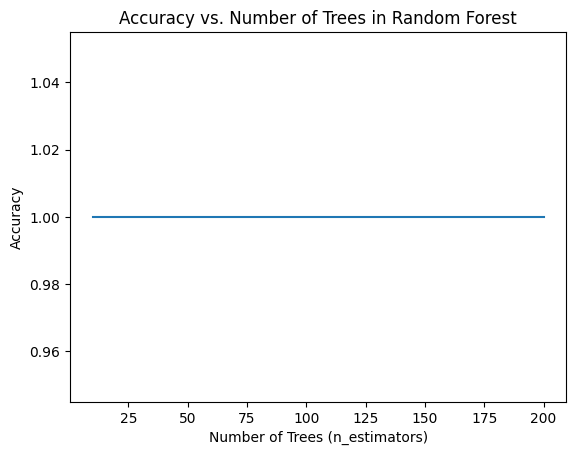

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of number of trees (n_estimators)
num_trees = [10, 20, 30, 40, 50, 100, 200]

# Store accuracy scores for each number of trees
accuracy_scores = []

# Train and evaluate for each number of trees
for n in num_trees:
    # Create a Random Forest Classifier with the current number of trees
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Accuracy with {n} trees: {accuracy}")

# Plot the accuracy scores against the number of trees
plt.plot(num_trees, accuracy_scores)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Trees in Random Forest")
plt.show()

#28.Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer


# 1. Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create a Bagging Classifier with Logistic Regression as the base estimator
bagging_classifier = BaggingClassifier(
    estimator=LogisticRegression(solver='liblinear'),
    n_estimators=10,
    random_state=42
)

# 4. Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# 5. Predict probabilities on the test set
y_pred_probs = bagging_classifier.predict_proba(X_test)[:, 1]

# 6. Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_probs)

# 7. Print the AUC score
print("AUC Score:", auc_score)

AUC Score: 0.99737962659679


#29.Train a Random Forest Regressor and Analyze feature importance scores.

Feature Importances:
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


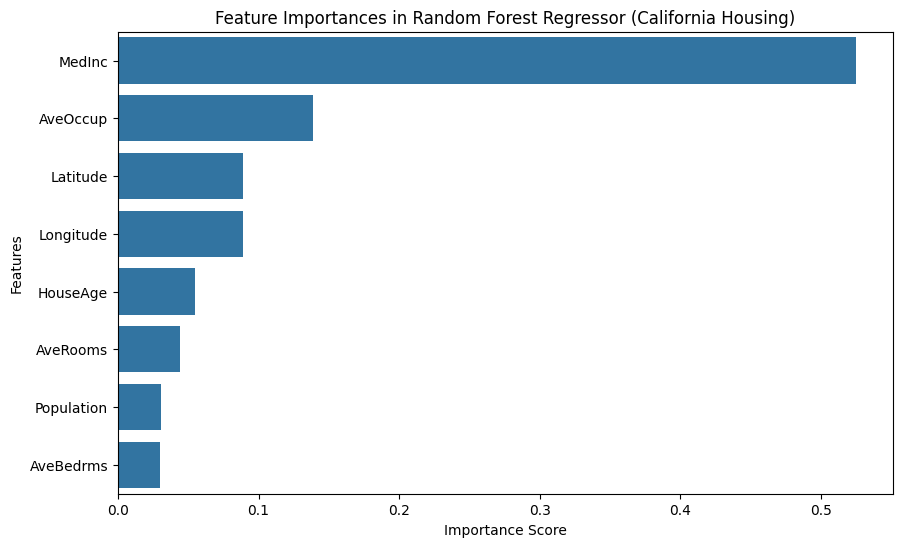

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing  # Using the California housing dataset

# Load the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target
feature_names = california.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:")
print(importance_df)

# Visualize feature importances using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest Regressor (California Housing)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#30.Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score

# Load the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target
feature_names = california.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Bagging Regressor
bagging_regressor = BaggingRegressor(n_estimators=100, random_state=42)
bagging_regressor.fit(X_train, y_train)

# Create and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
bagging_pred = bagging_regressor.predict(X_test)
rf_pred = rf_regressor.predict(X_test)

# Calculate R-squared scores
bagging_r2 = r2_score(y_test, bagging_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print R-squared scores
print(f"Bagging Regressor R-squared: {bagging_r2}")
print(f"Random Forest Regressor R-squared: {rf_r2}")

# Compare R-squared scores
if bagging_r2 > rf_r2:
    print("Bagging Regressor performed better.")
elif rf_r2 > bagging_r2:
    print("Random Forest Regressor performed better.")
else:
    print("Both models performed equally.")

Bagging Regressor R-squared: 0.8046988456668309
Random Forest Regressor R-squared: 0.8051230593157366
Random Forest Regressor performed better.


#31.Train a Random Forest Classifier and tune hyperparameters using Grid Search CV .

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create Grid Search CV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy with Best Hyperparameters: 1.0


#32.Train a Bagging Regressor with different number of base estimators and compare performence.

R-squared with 10 estimators: 0.7844762342339637
R-squared with 50 estimators: 0.8036499747356253
R-squared with 100 estimators: 0.8046988456668309
R-squared with 200 estimators: 0.806096246834142


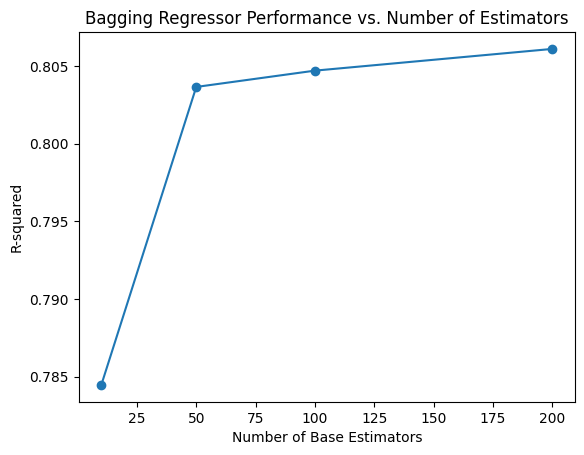

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score

# Load the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of number of base estimators
n_estimators_range = [10, 50, 100, 200]

# Store R-squared scores for each number of estimators
r2_scores = []

# Train and evaluate for each number of estimators
for n_estimators in n_estimators_range:
    # Create a Bagging Regressor with the current number of estimators
    bagging_regressor = BaggingRegressor(n_estimators=n_estimators, random_state=42)

    # Train the regressor
    bagging_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = bagging_regressor.predict(X_test)

    # Calculate R-squared and store it
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    print(f"R-squared with {n_estimators} estimators: {r2}")

# Plot the R-squared scores against the number of estimators
plt.plot(n_estimators_range, r2_scores, marker='o')
plt.xlabel("Number of Base Estimators")
plt.ylabel("R-squared")
plt.title("Bagging Regressor Performance vs. Number of Estimators")
plt.show()

#33.Train a Random Forest Classifier and analyze misclassified samples.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Identify misclassified samples
misclassified_indices = [i for i, (pred, true) in enumerate(zip(y_pred, y_test)) if pred != true]

# Create a DataFrame for misclassified samples
misclassified_df = pd.DataFrame(X_test[misclassified_indices], columns=feature_names)
misclassified_df['True Label'] = [target_names[true] for true in y_test[misclassified_indices]]
misclassified_df['Predicted Label'] = [target_names[pred] for pred in y_pred[misclassified_indices]]

# Print misclassified samples
print("\nMisclassified Samples:")
print(misclassified_df)

# Optionally, you can visualize the misclassified samples using a scatter plot
# (e.g., using seaborn) if you have two features you want to visualize.

Accuracy: 1.0

Misclassified Samples:
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), True Label, Predicted Label]
Index: []


#34.Train a Bagging and Compare its Performance With a single Decision Tree Classifier .

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Bagging Classifier
bagging_classifier = BaggingClassifier(n_estimators=100, random_state=42)  # Using 100 Decision Trees
bagging_classifier.fit(X_train, y_train)

# Create and train a single Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
bagging_pred = bagging_classifier.predict(X_test)
decision_tree_pred = decision_tree_classifier.predict(X_test)

# Calculate accuracy scores
bagging_accuracy = accuracy_score(y_test, bagging_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

# Print accuracy scores
print(f"Bagging Classifier Accuracy: {bagging_accuracy}")
print(f"Decision Tree Classifier Accuracy: {decision_tree_accuracy}")

# Compare accuracy scores
if bagging_accuracy > decision_tree_accuracy:
    print("Bagging Classifier performed better.")
elif decision_tree_accuracy > bagging_accuracy:
    print("Decision Tree Classifier performed better.")
else:
    print("Both models performed equally.")

Bagging Classifier Accuracy: 1.0
Decision Tree Classifier Accuracy: 1.0
Both models performed equally.


#35.Train a Random Forest Classifier and Visualize the confusion matrix.

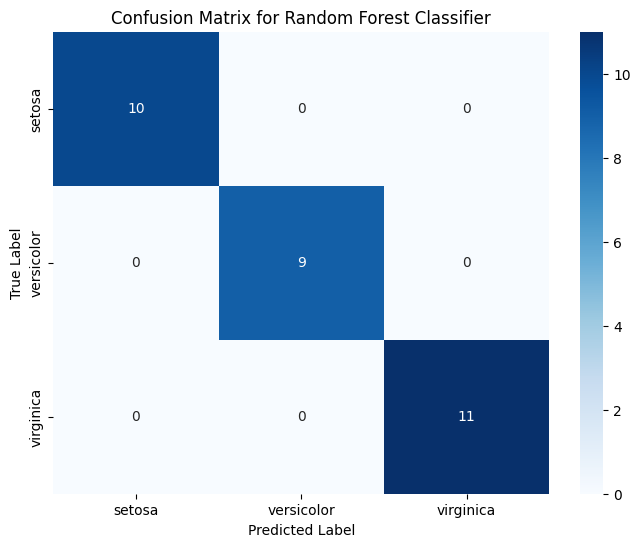

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names  # Get class names for the confusion matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

#36.Train a Stacking Classifier using Decision Trees ,SVM, and Logistic Regression ,and compare accuracy.

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(random_state=42)),
    ('lr', LogisticRegression(random_state=42, solver='liblinear'))  # Added solver for compatibility
]

# Create a Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(solver='liblinear')  # Added solver for compatibility
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Train individual base estimators for comparison
for name, estimator in estimators:
    estimator.fit(X_train, y_train)

# Make predictions on the test set
stacking_pred = stacking_classifier.predict(X_test)
dt_pred = estimators[0][1].predict(X_test)
svm_pred = estimators[1][1].predict(X_test)
lr_pred = estimators[2][1].predict(X_test)

# Calculate accuracy scores
stacking_accuracy = accuracy_score(y_test, stacking_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Print accuracy scores
print(f"Stacking Classifier Accuracy: {stacking_accuracy}")
print(f"Decision Tree Classifier Accuracy: {dt_accuracy}")
print(f"SVM Classifier Accuracy: {svm_accuracy}")
print(f"Logistic Regression Classifier Accuracy: {lr_accuracy}")

Stacking Classifier Accuracy: 1.0
Decision Tree Classifier Accuracy: 1.0
SVM Classifier Accuracy: 1.0
Logistic Regression Classifier Accuracy: 1.0


#37.Train a Random Forest Classifier and print the top 5 most importent features.

In [ ]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 most important features
print("Top 5 Most Important Features:")
print(feature_importance_df.head(5))

Top 5 Most Important Features:
             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


#38.Train a Bagging Classifier and evaluate performance using Precision, Recall,and F1-score.

In [ ]:


import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Bagging Classifier
bagging_classifier = BaggingClassifier(n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# You can also print a classification report for more detailed information
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

Accuracy with max_depth=1: 1.0
Accuracy with max_depth=2: 1.0
Accuracy with max_depth=3: 1.0
Accuracy with max_depth=4: 1.0
Accuracy with max_depth=5: 1.0
Accuracy with max_depth=6: 1.0
Accuracy with max_depth=7: 1.0
Accuracy with max_depth=8: 1.0
Accuracy with max_depth=9: 1.0
Accuracy with max_depth=10: 1.0
Accuracy with max_depth=11: 1.0
Accuracy with max_depth=12: 1.0
Accuracy with max_depth=13: 1.0
Accuracy with max_depth=14: 1.0
Accuracy with max_depth=15: 1.0
Accuracy with max_depth=16: 1.0
Accuracy with max_depth=17: 1.0
Accuracy with max_depth=18: 1.0
Accuracy with max_depth=19: 1.0
Accuracy with max_depth=20: 1.0


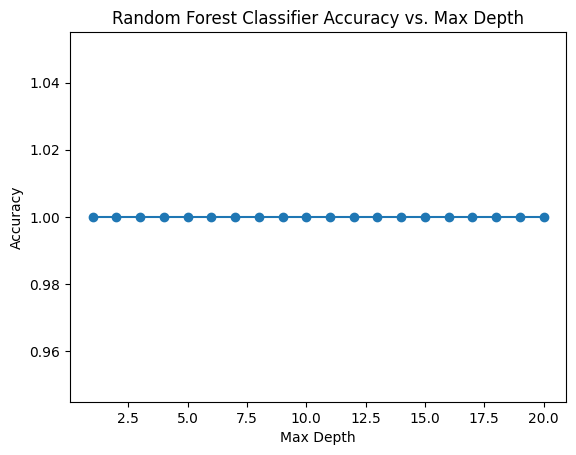

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of max_depth values
max_depth_values = range(1, 21)  # Explore depths from 1 to 20

# Store accuracy scores for each max_depth
accuracy_scores = []

# Train and evaluate for each max_depth
for max_depth in max_depth_values:
    # Create a Random Forest Classifier with the current max_depth
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Accuracy with max_depth={max_depth}: {accuracy}")

# Plot the accuracy scores against max_depth
plt.plot(max_depth_values, accuracy_scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier Accuracy vs. Max Depth")
plt.show()

#40.Train a Bagging Regressor Using different base estimators(Decision Tree and Kneighbors) and compare performance.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score

# Load the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = [
    ('DecisionTree', DecisionTreeRegressor(random_state=42)),
    ('KNeighbors', KNeighborsRegressor())
]

# Store R-squared scores for each base estimator
r2_scores = []

# Train and evaluate for each base estimator
for name, estimator in base_estimators:
    # Create a Bagging Regressor with the current base estimator
    bagging_regressor = BaggingRegressor(estimator=estimator, n_estimators=100, random_state=42)

    # Train the regressor
    bagging_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = bagging_regressor.predict(X_test)

    # Calculate R-squared and store it
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    print(f"R-squared with {name} base estimator: {r2}")

# Compare R-squared scores
if r2_scores[0] > r2_scores[1]:
    print("Bagging with Decision Tree performed better.")
elif r2_scores[1] > r2_scores[0]:
    print("Bagging with KNeighbors performed better.")
else:
    print("Both base estimators performed equally.")

R-squared with DecisionTree base estimator: 0.8046988456668309
R-squared with KNeighbors base estimator: 0.1786384574554135
Bagging with Decision Tree performed better.


#41. Train a Random Forest Classifier and evaluate its performence using ROC-AUC score.

Overall ROC AUC Score: 1.0
ROC AUC Score for Class setosa: 1.0
ROC AUC Score for Class versicolor: 1.0
ROC AUC Score for Class virginica: 1.0


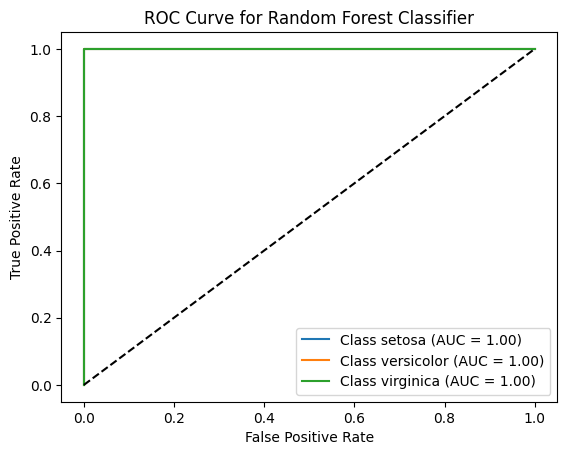

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Binarize the target labels for multi-class ROC AUC calculation
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)  # Train on the original target variable for better performance

# Make predictions on the test set (probabilities for each class)
y_pred_probs = rf_classifier.predict_proba(X_test)

# Calculate ROC AUC score using 'ovr' (one-vs-rest) method for multi-class
roc_auc = roc_auc_score(y_test, y_pred_probs, average='weighted', multi_class='ovr')
print(f"Overall ROC AUC Score: {roc_auc}")

# Optionally, you can also calculate ROC AUC for each class individually:
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    class_roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_probs[:, i])
    print(f"ROC AUC Score for Class {iris.target_names[i]}: {class_roc_auc}")

    # Plot ROC curve for the current class (optional)
    plt.plot(fpr, tpr, label=f'Class {iris.target_names[i]} (AUC = {class_roc_auc:.2f})')

# If you plotted individual ROC curves, show the plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

#42.Train a Bagging Classifier and Evaluate its performance using cross validation.

In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier  # Use DecisionTreeClassifier as the base estimator
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets (optional, but recommended for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with DecisionTreeClassifier as the base estimator
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                      n_estimators=10,  # Number of base estimators (trees)
                                      random_state=42)

# Perform cross-validation (e.g., 5-fold cross-validation)
scores = cross_val_score(bagging_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

# Optionally, train on the full training set and evaluate on the test set
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Cross-validation scores: [0.95833333 1.         0.83333333 0.95833333 0.95833333]
Mean accuracy: 0.9416666666666668
Test accuracy: 1.0


#43.Train a Random Forest Classifier and plot the precision-Recall curve.

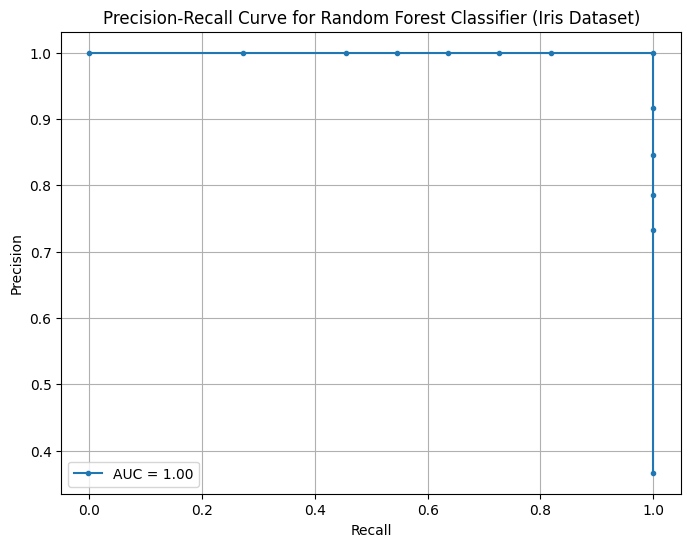

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (species)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# For binary classification, choose one class as the positive class
# Here, we'll consider class 2 (Virginica) as the positive class
pos_class = 2
y_test_binary = (y_test == pos_class).astype(int)
y_scores = rf_classifier.predict_proba(X_test)[:, pos_class]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_scores)

# Calculate the area under the curve (AUC)
pr_auc = auc(recall, precision)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier (Iris Dataset)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

#44.Train a stacking Classifier with a Random Forest and Logistic Regression and compare accuracy.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris  # Using Iris dataset for demonstration


# 1. Load and Prepare Data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Base Estimators and Final Estimator
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
]
final_estimator = LogisticRegression(random_state=42)

# 3. Create and Train the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking_classifier.fit(X_train, y_train)

# 4. Make Predictions and Evaluate Accuracy
y_pred_stacking = stacking_classifier.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")

# 5. Compare with Individual Models
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Stacking Classifier Accuracy: 1.0
Random Forest Accuracy: 1.0


#45.Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

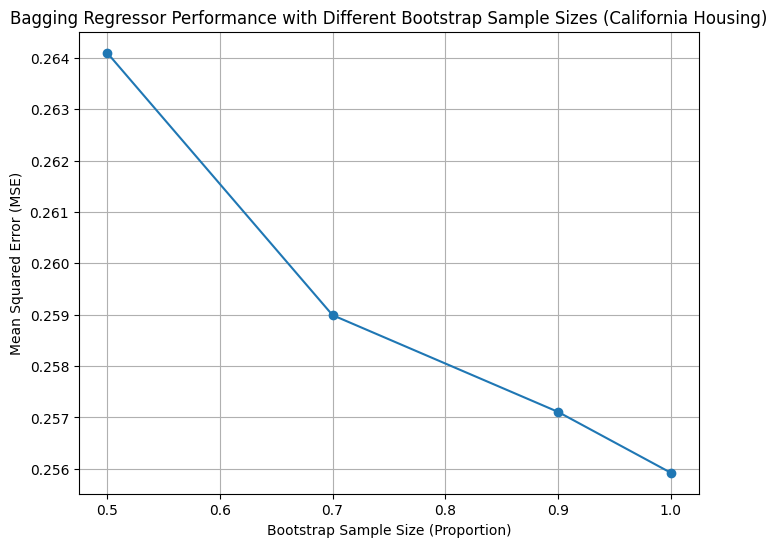

Bootstrap Sample Size: 0.5, MSE: 0.2641012699001638
Bootstrap Sample Size: 0.7, MSE: 0.25899257322758923
Bootstrap Sample Size: 0.9, MSE: 0.25710920456770864
Bootstrap Sample Size: 1.0, MSE: 0.25592438609899626


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

# 1. Load and Prepare Data
california = fetch_california_housing()
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Bootstrap Sample Sizes
bootstrap_sizes = [0.5, 0.7, 0.9, 1.0]  # Different proportions of training data

# 3. Train and Evaluate Bagging Regressors
mse_scores = []
for size in bootstrap_sizes:
    bagging_regressor = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=100,
        max_samples=size,       # Set bootstrap sample size
        random_state=42,
    )
    bagging_regressor.fit(X_train, y_train)
    y_pred = bagging_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# 4. Visualize Performance
plt.figure(figsize=(8, 6))
plt.plot(bootstrap_sizes, mse_scores, marker='o')
plt.xlabel('Bootstrap Sample Size (Proportion)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Bagging Regressor Performance with Different Bootstrap Sample Sizes (California Housing)')
plt.grid(True)
plt.show()

# Print MSE scores
for size, mse in zip(bootstrap_sizes, mse_scores):
    print(f"Bootstrap Sample Size: {size}, MSE: {mse}")